In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.optimize import minimize
import warnings
warnings.simplefilter("ignore")
from scipy import stats

In [2]:
dat=pd.read_csv("Foreign_Exchange_Rates.csv")

In [3]:
dat.head(5)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
ts1=pd.to_numeric(dat["AUSTRALIA - AUSTRALIAN DOLLAR/US$"],errors='coerce').dropna().reset_index()
ts1=ts1["AUSTRALIA - AUSTRALIAN DOLLAR/US$"]
ts2=pd.to_numeric(dat["EURO AREA - EURO/US$"],errors='coerce').dropna().reset_index()
ts2=ts2["EURO AREA - EURO/US$"]
ts3=pd.to_numeric(dat["JAPAN - YEN/US$"],errors='coerce').dropna().reset_index()
ts3=ts3["JAPAN - YEN/US$"]
ts4=pd.to_numeric(dat["UNITED KINGDOM - UNITED KINGDOM POUND/US$"],errors='coerce').dropna().reset_index()
ts4=ts4["UNITED KINGDOM - UNITED KINGDOM POUND/US$"]

In [14]:
np.mean(ts1)

1.3320154413229692

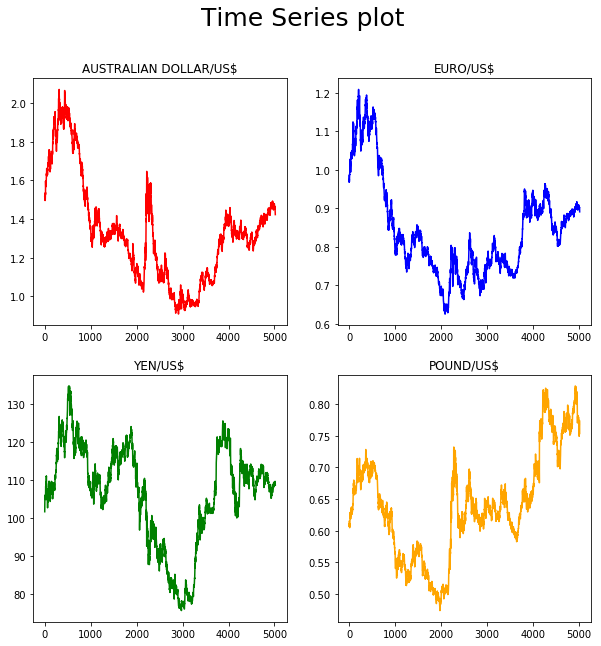

In [5]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(10);
fig.set_figwidth(10);
axs[0,0].plot(ts1,color="red")
axs[0,1].plot(ts2,color="blue")
axs[1,0].plot(ts3,color="green")
axs[1,1].plot(ts4,color="orange")
axs[0,0].set_title("AUSTRALIAN DOLLAR/US$");
axs[0,1].set_title("EURO/US$");
axs[1,0].set_title("YEN/US$");
axs[1,1].set_title("POUND/US$");
fig.suptitle("Time Series plot",size=25);

# Auto Regressive Model of Order p: AR(p)  

## Test for Stationarity

I am using ADF test for stationarity check here. The lag order (p) in the ADF test is given by the documentation of "tseries" package of R: $$p=trunc((length(x)-1)^{(1/3)})$$ where "trunc" is a function to make the float object into integer towards 0 and "x" is the time series.

In [102]:
def adf_test(data):
    k=int((len(data)-1)**(1/3))
    y=np.zeros(len(data)-k)
    x=np.zeros([len(data)-k,k])
    for i in range(k,len(data)):
        y[i-k]=data[i]-data[i-1]
        x[i-k,0]=data[i-1]
        for j in range(1,k):
            x[i-k,j]=data[i-j]-data[i-j-1]
    trend=np.reshape(np.arange(1,len(data)-k+1,1),(len(data)-k,1)) #Adding trend into the model
    x=np.hstack((trend,x))                                          # Addign trend as an explanatory variable
    x=np.hstack((np.ones([x.shape[0],1]),x))
    beta=np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(x),x)),np.matmul(np.matrix.transpose(x),y))
    res=y-np.matmul(x,beta)
    sd=np.matmul(np.matrix.transpose(res),res)/len(y)
    se=sd*np.linalg.inv(np.matmul(np.matrix.transpose(x),x))
    t=beta[2]/(se[2,2]**0.5)
    return t

### Augmented Dickey-Fuller (ADF) Test results

In [103]:
print("ADF test statistic for AUD/USD:",adf_test(ts1))
print("ADF test statistic for EURO/USD:",adf_test(ts2))
print("ADF test statistic for Yen/USD:",adf_test(ts3))
print("ADF test statistic for Pound/USD:",adf_test(ts4))

ADF test statistic for AUD/USD: -1.2677730700496275
ADF test statistic for EURO/USD: -1.4554354120522321
ADF test statistic for Yen/USD: -1.7261872864158123
ADF test statistic for Pound/USD: -1.8994865162260917


For model with trend and constant mean, the critical value for the ADF test statistic is -3.41 at 5% level of significance. Our obtained test statistic for all the four time series are larger than the critical value. Therefore, we cannot reject the null hypothesis of unit root. 

### ADF for First Order Difference

In [104]:
print("ADF test statistic for AUD/USD:",adf_test(np.diff(ts1)))
print("ADF test statistic for EURO/USD:",adf_test(np.diff(ts2)))
print("ADF test statistic for Yen/USD:",adf_test(np.diff(ts3)))
print("ADF test statistic for Pound/USD:",adf_test(np.diff(ts4)))

ADF test statistic for AUD/USD: -16.87003436808306
ADF test statistic for EURO/USD: -17.260498870939028
ADF test statistic for Yen/USD: -17.48666920828962
ADF test statistic for Pound/USD: -17.215546126251862


The test statistic value for the first order difference is significantly lower than the critical value. Therefore, we can conclude that the series is stationary at the first difference. 

## Model Selection

In [183]:
def log_lik(par, data, k):
    beta=par[:k+1]
    sig=par[k+1]
    phi=0
    for i in range(1,len(beta)):
        phi=phi+beta[i]
    init_mu=beta[0]/(1-phi)
    phi2=0
    for i in range(1,len(beta)):
        phi2=phi2+beta[i]**2
    init_sig=sig/(1-phi2)
    init_loglik=-0.5*np.log(init_sig)-0.5*(1/init_sig)*(data[0]-init_mu)**2
    y=np.zeros(len(data)-k)
    x=np.zeros([len(data)-k,k])
    for i in range(k,len(data)):
        y[i-k]=data[i]
        x[i-k,0]=data[i-1]
        for j in range(1,k):
            x[i-k,j]=data[i-j]
    x=np.hstack((np.ones([x.shape[0],1]),x))
    exact_loglik=init_loglik
    for i in range(1,len(y)):
        exact_loglik=exact_loglik-0.5*np.log(sig)-0.5*(1/sig)*(y[i]-np.matmul(x[i,],beta))**2
    return -exact_loglik

In [184]:
def sig_cons(par):
    return par[len(par)-1]
def beta_cons(par):
    return 1-np.sum(par[:-1])
def beta2_cons(par):
    return 1-np.sum(par[:-1]**2)

In [185]:
cons = ({'type': 'ineq', 'fun': sig_cons},
        {'type': 'ineq', 'fun': beta_cons},
        {'type': 'ineq', 'fun': beta2_cons})

In [186]:
mod1=minimize(log_lik,np.array([-0.1,-0.1,0.5]),args=(np.diff(ts1),1),constraints=cons,method='SLSQP')
aic1=2*3+2*mod1.fun
mod1

     fun: -20118.213500517442
     jac: array([ 1.13208008e+00, -6.83593750e-03,  7.25422363e+01])
 message: 'Optimization terminated successfully.'
    nfev: 257
     nit: 41
    njev: 41
  status: 0
 success: True
       x: array([-2.04756081e-05, -5.17906814e-02,  1.20956937e-04])

In [187]:
mod2=minimize(log_lik,np.array([0.1,0.1,0.1,0.5]),args=(np.diff(ts1),2),constraints=cons,method='SLSQP')
aic2=2*3+2*mod2.fun
mod2

     fun: -20113.731168966664
     jac: array([-0.26367188, -0.01025391, -0.01025391, -3.24023438])
 message: 'Optimization terminated successfully.'
    nfev: 208
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([-2.10194798e-05, -2.59031290e-02, -2.59031290e-02,  1.20979309e-04])

In [190]:
mod3=minimize(log_lik,np.array([-0.1,-0.1,0.1,0.1,0.5]),args=(np.diff(ts1),3),constraints=cons,method='SLSQP')
aic3=2*3+2*mod3.fun
mod3

     fun: -20109.576921803702
     jac: array([-5.91699219e+00, -6.34765625e-03, -6.34765625e-03, -5.20019531e-02,
        5.02682129e+02])
 message: 'Optimization terminated successfully.'
    nfev: 376
     nit: 46
    njev: 46
  status: 0
 success: True
       x: array([-2.05605752e-05, -2.56241334e-02, -2.55714218e-02,  1.16819162e-02,
        1.20989225e-04])

In [192]:
mod4=minimize(log_lik,np.array([-0.1,-0.1,-0.1,0.1,0.1,0.5]),args=(np.diff(ts1),4),constraints=cons,method='SLSQP')
aic4=2*3+2*mod4.fun
mod4

     fun: -20110.292040937893
     jac: array([-1.75512695e+00,  6.32324219e-02,  6.34765625e-02, -2.63671875e-02,
        3.34472656e-02,  8.72734619e+02])
 message: 'Optimization terminated successfully.'
    nfev: 454
     nit: 49
    njev: 49
  status: 0
 success: True
       x: array([-2.07089080e-05, -2.53866306e-02, -2.52729417e-02,  9.36827961e-03,
       -4.54510246e-02,  1.20763495e-04])

In [193]:
mod5=minimize(log_lik,np.array([-0.1,-0.1,0.1,0.1,0.1,0.1,0.5]),args=(np.diff(ts1),5),constraints=cons,method='SLSQP')
aic5=2*3+2*mod5.fun
mod5

     fun: -20111.174969007323
     jac: array([-2.84912109e-01,  1.04980469e-02,  1.07421875e-02, -1.14746094e-02,
        6.10351562e-03, -4.63867188e-03,  1.72678223e+01])
 message: 'Optimization terminated successfully.'
    nfev: 341
     nit: 35
    njev: 34
  status: 0
 success: True
       x: array([-1.91269539e-05, -2.44836224e-02, -2.41036516e-02,  8.93431698e-03,
       -4.30963949e-02,  4.61717207e-02,  1.20522917e-04])

In [272]:
def predict(data,k,test):
    y=np.zeros(len(data)-k)
    x=np.zeros([len(data)-k,k])
    for i in range(k,len(data)):
        y[i-k]=data[i]
        x[i-k,0]=data[i-1]
        for j in range(1,k):
            x[i-k,j]=data[i-j]
    x=np.hstack((np.ones([x.shape[0],1]),x))
    beta=np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(x),x)),np.matmul(np.matrix.transpose(x),y))
    y=np.zeros(test)
    x=np.zeros([test,k])
    for i in range(test):
        y[i]=data[test+i]
        for j in range(k):
            x[i,j]=data[test+i-1-j]
    x=np.hstack((np.ones([x.shape[0],1]),x))
    forecast=x@beta
    mse=(y-forecast)@(y-forecast)/len(y)
    return {"test":y,"pred":forecast,"mse":mse,"par":beta}

In [271]:
rs1=predict(np.diff(ts1),1,100)
rs1["par"]

TypeError: predict() missing 1 required positional argument: 'test'

In [256]:
rs2=predict([0.1,0.1,0.1,0.5],np.diff(ts1),2,100)
rs2

array([[ 1.    ,  0.0104],
       [ 1.    ,  0.004 ],
       [ 1.    , -0.0049],
       [ 1.    , -0.0158],
       [ 1.    ,  0.0182]])

array([-0.0022,  0.0104,  0.004 , -0.0049, -0.0158,  0.0182, -0.004 ])

array([ 0.004 , -0.0049, -0.0158,  0.0182, -0.004 ])

In [ ]:
rs3=predict((-0.1,-0.1,0.1,0.1,0.5),np.diff(ts1),3,100)
rs3

In [ ]:
rs4=predict((-0.1,-0.1,-0.1,0.1,0.1,0.5),np.diff(ts1),4,100)

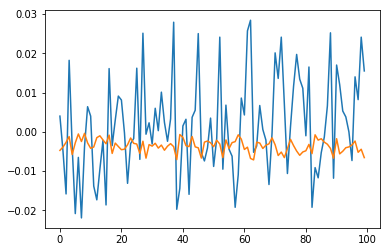

In [249]:
plt.plot(rs["test"])
plt.plot(rs["pred"])
plt.show()

In [153]:
k=2
data=np.diff(ts1)
y=np.zeros(len(data)-k)
x=np.zeros([len(data)-k,k])
for i in range(k,len(data)):
    y[i-k]=data[i]-data[i-1]
    x[i-k,0]=data[i-1]
    for j in range(1,k):
        x[i-k,j]=data[i-j]-data[i-j-1]
x=np.hstack((np.ones([x.shape[0],1]),x))
beta=np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(x),x)),np.matmul(np.matrix.transpose(x),y))
beta

array([-2.15578448e-05, -1.03947530e+00, -1.17144008e-02])

In [195]:
aic1=2*1-2*mod1.fun
aic2=2*2-2*mod2.fun
aic3=2*3-2*mod3.fun
aic4=2*4-2*mod4.fun
aic5=2*5-2*mod5.fun
aic1
aic2
aic3
aic4
aic5

40238.427001034885

40231.46233793333

40225.153843607404

40228.584081875786

40232.349938014646

#### Serial correlation check

In [19]:
def res(data,beta):
    k=len(beta)-1
    y=np.zeros(len(data)-k)
    x=np.zeros([len(data)-k,k])
    for i in range(len(data)-k):
        y[i]=data[i]
        for j in range(k):
            x[i,j]=data[i+j+1]
    x=np.hstack((np.ones([x.shape[0],1]),x))
    ehat=y-np.matmul(x,beta)
    return ehat
res(np.diff(ts1),mod1.x)

array([ 0.00686374,  0.00294354,  0.00232096, ..., -0.00135613,
       -0.00379471, -0.00825486])

In [33]:
k=3
w=res(np.diff(ts1),mod1.x)
y=np.zeros(len(w)-k)
x=np.zeros([len(w)-k,k])
for i in range(len(w)-k):
    y[i]=w[i]
    for j in range(k):
        x[i,j]=w[i+j+1]
theta=np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(x),x)),np.matmul(np.matrix.transpose(x),y))
theta
w_res=y-np.matmul(x,theta)
res_sd=np.matmul(np.ones(len(w_res)),w_res*w_res)/(len(w_res)-k)
theta_sd=res_sd*np.linalg.inv(np.matmul(np.matrix.transpose(x),x))
theta_sd

array([ 0.00085173,  0.00909894, -0.04362031])

array([[ 1.99235830e-04, -8.58478221e-08, -1.80699192e-06],
       [-8.58478221e-08,  1.99217600e-04, -9.39533699e-08],
       [-1.80699192e-06, -9.39533699e-08,  1.99213348e-04]])

In [34]:
R=np.identity(k)
r=np.zeros(k)
w1=np.matrix.transpose((np.matmul(R,theta)-r))
w2=np.linalg.inv(np.matmul(np.matmul(R,theta_sd),np.matrix.transpose(R)))
w3=np.matmul(R,theta)-r
wald=np.matmul(np.matmul(w1,w2),w3)
wald

9.965989471173836

In [35]:
1-stats.chi2.cdf(wald,k)

0.018857460788552327

#### ACF and PACF

<BarContainer object of 30 artists>

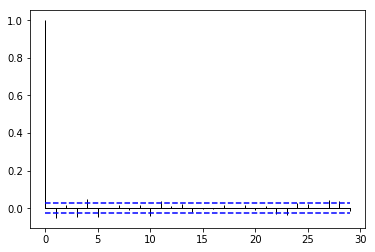

In [23]:
resid=np.diff(ts1)
ACF=np.zeros(30)
ACF[0]=stats.pearsonr(resid,resid)[0]
for i in range(1,len(ACF)):
    lag=resid[i:]
    new_res=resid[:len(lag)]
    ACF[i]=stats.pearsonr(new_res,lag)[0]

plt.bar(range(len(ACF)), ACF, width=0, ec="k");
plt.plot(range(len(ACF)),np.ones(30)*(1.96/(len(np.diff(ts1)))**0.5),linestyle='dashed',color="blue");
plt.plot(range(len(ACF)),-np.ones(30)*(1.96/(len(np.diff(ts1)))**0.5),linestyle='dashed',color="blue");
plt.plot(range(len(ACF)),np.zeros(30),linestyle='solid',color="black",linewidth=1);
plt.show()

<BarContainer object of 25 artists>

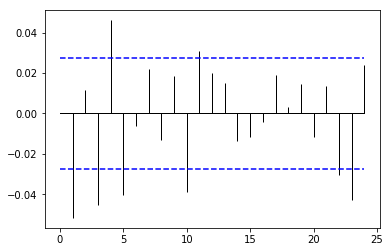

In [24]:
w=np.diff(ts1)
PACF=np.zeros(25)
for k in range(1,len(PACF)):
    y=np.zeros(len(w)-k)
    x=np.zeros([len(w)-k,k])
    for i in range(len(w)-k):
        y[i]=w[i]
        for j in range(k):
            x[i,j]=w[i+j+1]
    theta=np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(x),x)),np.matmul(np.matrix.transpose(x),y))
    PACF[k]=theta[k-1]
plt.bar(range(len(PACF)), PACF, width=0, ec="k");
plt.plot(range(len(PACF)),np.ones(25)*(1.96/(len(np.diff(ts1)))**0.5),linestyle='dashed',color="blue");
plt.plot(range(len(PACF)),-np.ones(25)*(1.96/(len(np.diff(ts1)))**0.5),linestyle='dashed',color="blue");
plt.plot(range(len(PACF)),np.zeros(25),linestyle='solid',color="black",linewidth=1);
plt.show()

### MA(q=2) model

In [135]:
def MA(par):
    beta=par[:-1]
    sig=par[len(par)-1]
    data=np.diff(ts1)
    q=2
    rho1=ACF[1]
    rho2=ACF[2]
    rat=rho1/rho2
    #theta2=(-rat+(rat**2-4*(rho1*rat+rho1-rat)*rho1))/(2*((rho1*rat+rho1-rat)))
    theta2=-0.25 # Here, we are just taking a value for theta: The recommeneded initial value of theta can be 
    theta1=0.50  # found in Box Jenkins book
    et=np.zeros(len(data))
    for i in range(q+1,len(data)):
        et[i]=data[i]+theta1*et[i-1]+theta2*et[i-2]
    y=np.zeros(len(data)-q)
    x=np.zeros([len(data)-q,q])
    for i in range(q+1,len(data)-q):
        y[i]=data[i]
        for j in range(q):
            x[i,j]=et[i+j+1]
    tot_loglik=0
    for i in range(1,len(y)):
        tot_loglik=tot_loglik-0.5*np.log(sig)-0.5*(1/sig)*(y[i]-np.matmul(x[i,],beta))**2
    return -tot_loglik

In [136]:
def sig_cons(par):
    return par[len(par)-1]

In [137]:
cons = ({'type': 'ineq', 'fun': sig_cons})

In [138]:
minimize(MA,np.array([0.2,0.2,0.5]),constraints=cons,method='SLSQP')

C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


     fun: -20637.89641017618
     jac: array([1.07421875e-02, 8.78906250e-03, 3.66255615e+02])
 message: 'Optimization terminated successfully.'
    nfev: 117
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 4.26306665e-01, -1.61715316e-01,  9.80013933e-05])

### ARIMA (p,d,q) model

In [167]:
def ARIMA(par):
    p=1
    d=1
    q=1
    data=ts1
    
    for i in (range(d)):
        data=np.diff(data)
    
    y=np.zeros(len(data)-np.maximum(p,q))
    x=np.zeros([len(data)-np.maximum(p,q),p])
    
    for i in range(len(data)-np.maximum(p,q)):
        y[i]=data[i]
        for j in range(p):
            x[i,j]=data[i+j+1]
    x=np.hstack((np.ones([x.shape[0],1]),x))
    theta=np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(x),x)),np.matmul(np.matrix.transpose(x),y))
    res=y-np.matmul(x,theta)
    z=np.zeros([len(data)-np.maximum(p,q),q])
    for i in range(len(data)-np.maximum(p,q)):
        for j in range(q):
            z[i,j]=res[i+j]
    x=np.hstack((x,z))
    
    beta=par[:-1]
    sig=par[len(par)-1]
    phi=0
    for i in range(p):
        phi=phi+beta[i]
    init_mu=beta[0]/(1-phi)
    phi2=0
    for i in range(p):
        phi2=phi2+beta[i]**2
    init_sig=sig/(1-phi2)
    init_loglik=-0.5*np.log(init_sig)-0.5*(1/init_sig)*(data[0]-init_mu)**2
    exact_loglik=init_loglik
    for i in range(1,len(y)):
        exact_loglik=exact_loglik-0.5*np.log(sig)-0.5*(1/sig)*(y[i]-np.matmul(x[i,],beta))**2
    return -exact_loglik

In [168]:
q=1
def sig_cons(par):
    return par[len(par)-1]
def beta_cons(par):
    return 1-np.sum(par[:-1-q])
def beta2_cons(par):
    return 1-np.sum(par[:-1-q]**2)

In [169]:
cons = ({'type': 'ineq', 'fun': sig_cons},
        {'type': 'ineq', 'fun': beta_cons},
        {'type': 'ineq', 'fun': beta2_cons})

In [196]:
minimize(ARIMA,np.array([-0.01,-0.01,0.001,0.5]),constraints=cons,method='SLSQP')

C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log
C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
C:\Users\Shakil\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


     fun: -43908.83534352946
     jac: array([3.02442506e+06, 7.26785586e+04, 7.30264404e+03, 5.29257630e+10])
 message: 'Optimization terminated successfully.'
    nfev: 682
     nit: 94
    njev: 93
  status: 0
 success: True
       x: array([-1.26100400e-05, -5.07904778e-02,  1.00009799e+00,  8.13407269e-09])

In [179]:
def log_lik(par):
    data=np.diff(ts2)
    beta=par[:-1]
    sig=par[len(par)-1]
    phi=0
    for i in range(1,len(beta)):
        phi=phi+beta[i]
    init_mu=beta[0]/(1-phi)
    phi2=0
    for i in range(1,len(beta)):
        phi2=phi2+beta[i]**2
    init_sig=sig/(1-phi2)
    init_loglik=-0.5*np.log(init_sig)-0.5*(1/init_sig)*(data[0]-init_mu)**2
    k=len(beta)-1
    y=np.zeros(len(data)-k)
    x=np.zeros([len(data)-k,k])
    for i in range(len(data)-k):
        y[i]=data[i]
        for j in range(k):
            x[i,j]=data[i+j+1]
    x=np.hstack((np.ones([x.shape[0],1]),x))
    exact_loglik=init_loglik
    for i in range(1,len(y)):
        exact_loglik=exact_loglik-0.5*np.log(sig)-0.5*(1/sig)*(y[i]-np.matmul(x[i,],beta))**2
    return -exact_loglik

In [180]:
def sig_cons(par):
    return par[len(par)-1]
def beta_cons(par):
    return 1-np.sum(par[:-1])
def beta2_cons(par):
    return 1-np.sum(par[:-1]**2)

In [181]:
cons = ({'type': 'ineq', 'fun': sig_cons},
        {'type': 'ineq', 'fun': beta_cons},
        {'type': 'ineq', 'fun': beta2_cons})

In [190]:
mod1=minimize(log_lik,np.array([-0.1,0.2,1]),constraints=cons,method='SLSQP')
aic1=2*3+2*mod1.fun
mod1

     fun: -23870.507677534482
     jac: array([-2.07058105e+01, -5.09765625e-01,  1.21943728e+04])
 message: 'Optimization terminated successfully.'
    nfev: 362
     nit: 57
    njev: 57
  status: 0
 success: True
       x: array([-1.85649021e-05,  1.05694462e-02,  2.70995781e-05])

In [194]:
mod2=minimize(log_lik,np.array([-0.1,0.2,-0.1,1]),constraints=cons,method='SLSQP')
aic2=2*3+2*mod2.fun
mod2

     fun: -23866.102090142773
     jac: array([ 4.28515625e+00,  7.32421875e-03, -1.46484375e-02, -4.23796875e+02])
 message: 'Optimization terminated successfully.'
    nfev: 303
     nit: 43
    njev: 42
  status: 0
 success: True
       x: array([-1.79554487e-05,  1.08248532e-02, -1.60284330e-02,  2.70920757e-05])

In [196]:
mod3=minimize(log_lik,np.array([-0.1,0.2,-0.1,-0.1,1]),constraints=cons,method='SLSQP')
aic3=2*3+2*mod3.fun
mod3

     fun: -23861.472885376283
     jac: array([ 7.64355469e+00,  1.78222656e-02, -9.66796875e-02,  1.24511719e-02,
        3.73666748e+02])
 message: 'Optimization terminated successfully.'
    nfev: 332
     nit: 41
    njev: 40
  status: 0
 success: True
       x: array([-1.68259752e-05,  1.06392432e-02, -1.60510389e-02, -2.59609276e-03,
        2.70909172e-05])

In [199]:
mod4=minimize(log_lik,np.array([-0.1,0.2,-0.1,-0.1,0.2,1]),constraints=cons,method='SLSQP')
aic4=2*3+2*mod4.fun
mod4

     fun: -23860.141712880926
     jac: array([-1.96757812e+01, -1.42089844e-01,  2.90283203e-01, -3.32031250e-02,
       -8.86230469e-02,  1.81501875e+04])
 message: 'Optimization terminated successfully.'
    nfev: 357
     nit: 38
    njev: 37
  status: 0
 success: True
       x: array([-1.61242581e-05,  1.06434866e-02, -1.53793137e-02, -3.03735482e-03,
        3.93954323e-02,  2.70590879e-05])

In [201]:
mod5=minimize(log_lik,np.array([-0.1,0.2,-0.1,-0.1,0.2,0.2,1]),constraints=cons,method='SLSQP')
aic5=2*3+2*mod5.fun
mod5

     fun: -23858.02409865041
     jac: array([-1.33544922e+00,  1.24511719e-02,  2.63671875e-02,  5.85937500e-03,
       -1.46484375e-03,  1.07910156e-01,  6.79401123e+02])
 message: 'Optimization terminated successfully.'
    nfev: 537
     nit: 53
    njev: 52
  status: 0
 success: True
       x: array([-1.65666376e-05,  1.20715102e-02, -1.55126525e-02, -3.55422053e-03,
        3.98064304e-02, -3.53919647e-02,  2.70254757e-05])

In [202]:
aic1
aic2
aic3
aic4
aic5

-47735.015355068965

-47726.204180285546

-47716.945770752565

-47714.28342576185

-47710.04819730082